In [15]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy import signal
from scipy import stats

In [16]:
visitnum = ['FirstVisit/', 'Later7thVisit/' ,'Later20thVisit/']

n = []
peaksloc = []
peaks = []
v = []
isi = []

for visit in visitnum:
    path = os.path.join('../dataFolders/PaperPipelineOutput/v3/RadiusAndAngle/', visit)
    Allpath = glob.glob(path + 'c*.csv')
    
    outpathfig = os.path.join('../dataFolders/PaperPipelineOutput/Figures/v3/Dynamics-Rythmicity/',visit)
    print(visit)
    

    for path in Allpath:
        name = os.path.basename(path).split('_')[0] + '_' + os.path.basename(path).split('_')[1] 
        
        data = pd.read_csv(path)
        
        r = data.radial_distance_normalized.values
        r[r > 2.5] = np.nan

        # get the number of peaks
        ind, _ = signal.find_peaks(r, prominence=(0.5, ) )
        ISI = ind[1:] - ind[:-1]
        
        print(visit, name, len(ind))
                
        n.append(name)
        peaksloc.append(ind)
        peaks.append(len(ind))
        isi.append(ISI)
        v.append(visit)

FirstVisit/
FirstVisit/ c-10_m10 2
FirstVisit/ c-10_m11 14
FirstVisit/ c-10_m12 40
FirstVisit/ c-10_m13 1
FirstVisit/ c-10_m15 6
FirstVisit/ c-10_m16 1
FirstVisit/ c-10_m17 3
FirstVisit/

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


 c-10_m18 35
FirstVisit/ c-10_m19 5
FirstVisit/ c-10_m1 14
FirstVisit/ c-10_m20 6
FirstVisit/ c-10_m21 12
FirstVisit/ c-10_m22 3
FirstVisit/ c-10_m23 83
FirstVisit/ c-10_m24 18
FirstVisit/ c-10_m2 1
FirstVisit/ c-10_m6 0
FirstVisit/ c-10_m7 4
FirstVisit/ c-10_m8 44
FirstVisit/ c-10_m9 15
FirstVisit/ c-1_m10 0
FirstVisit/ c-1_m11 4
FirstVisit/ c-1_m13 6
FirstVisit/ c-1_m14 0
FirstVisit/ c-1_m16 0
FirstVisit/ c-1_m17 0
FirstVisit/ c-1_m18 3
FirstVisit/ c-1_m19 1
FirstVisit/ c-1_m1 11
FirstVisit/ c-1_m20 7
FirstVisit/ c-1_m22 0
FirstVisit/ c-1_m23 26
FirstVisit/ c-1_m3 5
FirstVisit/ c-1_m4 2
FirstVisit/ c-1_m6 3
FirstVisit/ c-1_m8 3
FirstVisit/ c-2_m10 2
FirstVisit/ c-2_m11 10
FirstVisit/ c-2_m12 2
FirstVisit/ c-2_m13 55
FirstVisit/ c-2_m14 0
FirstVisit/ c-2_m15 3
FirstVisit/ c-2_m16 24
FirstVisit/ c-2_m17 0
FirstVisit/ c-2_m1 1
FirstVisit/ c-2_m20 3
FirstVisit/ c-2_m21 0
FirstVisit/ c-2_m23 3
FirstVisit/ c-2_m3 1
FirstVisit/ c-2_m4 1
FirstVisit/ c-2_m6 1
FirstVisit/ c-2_m7 0
FirstVisit/ 

In [17]:
newdf = pd.DataFrame([n, peaksloc, peaks, isi, v]).T
newdf.columns = ['names', 'PeakLocation', 'numPeaks', 'InterSweepInterval', 'visitNum']
newdf

,names,PeakLocation,numPeaks,InterSweepInterval,visitNum
0,c-10_m10,"[67, 132]",2,[65],FirstVisit/
1,c-10_m11,"[66, 130, 187, 255, 363, 456, 560, 649, 720, 7...",14,"[64, 57, 68, 108, 93, 104, 89, 71, 64, 132, 52...",FirstVisit/
2,c-10_m12,"[60, 76, 105, 188, 364, 437, 668, 682, 713, 72...",40,"[16, 29, 83, 176, 73, 231, 14, 31, 9, 15, 200,...",FirstVisit/
3,c-10_m13,[121],1,[],FirstVisit/
4,c-10_m15,"[64, 172, 207, 225, 232, 249]",6,"[108, 35, 18, 7, 17]",FirstVisit/
...,...,...,...,...,...
171,c-3_m22,"[109, 154, 214]",3,"[45, 60]",Later20thVisit/
172,c-3_m23,[],0,[],Later20thVisit/
173,c-3_m24,[],0,[],Later20thVisit/
174,c-3_m25,"[75, 212, 228, 276]",4,"[137, 16, 48]",Later20thVisit/


In [18]:
# save this data as a csv
datapath = r"../dataFolders/PaperPipelineOutput/v3/"
SweepDynamics = pd.read_csv(datapath + 'SweepDynamics.csv')
SweepDynamics

,Unnamed: 0,names,numPeaks,freq,visitNum,flower,mothname
0,0,c-10_m10,2,1.923077,FirstVisit/,c-10,m10
1,1,c-10_m11,14,1.438849,FirstVisit/,c-10,m11
2,2,c-10_m12,40,0.129702,FirstVisit/,c-10,m12
3,3,c-10_m13,1,2.564103,FirstVisit/,c-10,m13
4,4,c-10_m15,6,0.000000,FirstVisit/,c-10,m15
...,...,...,...,...,...,...,...
171,171,c-3_m22,3,1.818182,Later20thVisit/,c-3,m22
172,172,c-3_m23,0,4.545455,Later20thVisit/,c-3,m23
173,173,c-3_m24,0,5.882353,Later20thVisit/,c-3,m24
174,174,c-3_m25,4,1.041667,Later20thVisit/,c-3,m25


In [19]:
result = pd.merge(SweepDynamics, newdf, on= ['names', 'visitNum'] ,how = 'inner')
result

,Unnamed: 0,names,numPeaks_x,freq,visitNum,flower,mothname,PeakLocation,numPeaks_y,InterSweepInterval
0,0,c-10_m10,2,1.923077,FirstVisit/,c-10,m10,"[67, 132]",2,[65]
1,1,c-10_m11,14,1.438849,FirstVisit/,c-10,m11,"[66, 130, 187, 255, 363, 456, 560, 649, 720, 7...",14,"[64, 57, 68, 108, 93, 104, 89, 71, 64, 132, 52..."
2,2,c-10_m12,40,0.129702,FirstVisit/,c-10,m12,"[60, 76, 105, 188, 364, 437, 668, 682, 713, 72...",40,"[16, 29, 83, 176, 73, 231, 14, 31, 9, 15, 200,..."
3,3,c-10_m13,1,2.564103,FirstVisit/,c-10,m13,[121],1,[]
4,4,c-10_m15,6,0.000000,FirstVisit/,c-10,m15,"[64, 172, 207, 225, 232, 249]",6,"[108, 35, 18, 7, 17]"
...,...,...,...,...,...,...,...,...,...,...
171,171,c-3_m22,3,1.818182,Later20thVisit/,c-3,m22,"[109, 154, 214]",3,"[45, 60]"
172,172,c-3_m23,0,4.545455,Later20thVisit/,c-3,m23,[],0,[]
173,173,c-3_m24,0,5.882353,Later20thVisit/,c-3,m24,[],0,[]
174,174,c-3_m25,4,1.041667,Later20thVisit/,c-3,m25,"[75, 212, 228, 276]",4,"[137, 16, 48]"


In [6]:
result.to_csv(datapath + 'SweepDynamics_ISI.csv')

# plot the interspike interval

In [20]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 0.5 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams["lines.linewidth"] = 0.5

mpl.rc('font',**{'family':'sans-serif','serif':['Arial']})
mpl.rcParams['pdf.fonttype'] = 42

In [21]:
pal = {'FirstVisit/': '#ff9966' , 'Later7thVisit/': '#acc568' , 'Later20thVisit/': '#7bc368'}
kwargs = {'palette': pal 
          ,'hue_order': ['FirstVisit/', 'Later7thVisit/', 'Later20thVisit/']}
color = ['#ff9966' , '#acc568' , '#7bc368']

In [22]:
outpath = r"../dataFolders/PaperPipelineOutput/Figures/v3/Paper/"
shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
visitnum = ['FirstVisit/','Later7thVisit/' , 'Later20thVisit/']

In [23]:
ISI = np.concatenate(result.InterSweepInterval)
std = np.std(ISI*1/100)
stdFreq = 1/std


q25 = 1/np.quantile(ISI*1/100, .25)
q50 = 1/np.quantile(ISI*1/100, .50)
q75 = 1/np.quantile(ISI*1/100, .75)

stdFreq, q25, q75, q50

(0.7050166224827561, 2.857142857142857, 1.1235955056179776, 1.7857142857142856)

In [24]:
med_ISI = np.quantile(ISI*1/100, .50)
med_ISI

0.56

FirstVisit/
c-10
c-1
c-2
c-3
Later7thVisit/
c-10
c-1
c-2
c-3
Later20thVisit/
c-10
c-1
c-2
c-3


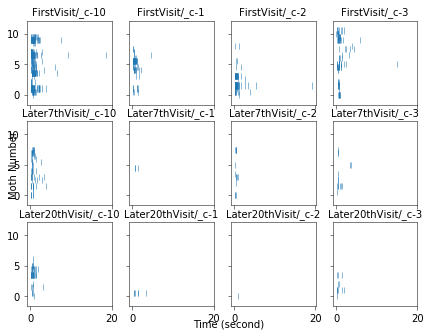

In [25]:
f, ax = plt.subplots(3, 4,
                     sharex = True, sharey = True,
                    figsize = (7,7/4*3))
# ax = ax.ravel()

r = 0
for visit, df in result.groupby('visitNum', sort = False):
    print(visit)
    c = 0
    for flowers, subdf in df.groupby('flower', sort = False):
        print(flowers)
        sl = subdf.loc[:, ['mothname', 'InterSweepInterval']]
#         axNum = r + c
        ax[r,c].eventplot(positions = sl.InterSweepInterval.values*1/100,
                      orientation = 'horizontal'
                     , linelengths = 1
                     , lineoffsets = 0.5
                         , linewidth = 0.5)
        ax[r,c].set_title(visit + '_' + flowers)
        c+=1
    r+=1
#         ticklocs = np.arange(len(sl))
#         plt.yticks(locs =  ticklocs
#                    ,labels = sl.mothname)

f.text(0.525, 0.07, 'Time (second)', ha='center')
f.text(0.09, 0.5, 'Moth Number', va='center', rotation='vertical')
plt.savefig(r"../dataFolders/PaperPipelineOutput/Figures/v3/Paper/" + 'InterSweepInterval.pdf')

## test values of one eventplot

[array([], dtype=int64) array([ 16,  40, 138], dtype=int64)
 array([  8,  19, 122, 122, 147], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64)
 array([ 87, 163], dtype=int64) array([], dtype=int64)
 array([ 34,  38,  43,  44,  59,  74,  77,  86, 153, 213], dtype=int64)
 array([  6,  14,  40,  76, 103, 139], dtype=int64) array([], dtype=int64)
 array([ 10,  14,  16,  17,  21,  24,  27,  38,  40,  45,  46,  48,  51,
        51,  54,  58,  59,  72,  72,  93,  95,  98, 101, 110, 114],
      dtype=int64)
 array([39, 39, 61, 90], dtype=int64) array([450], dtype=int64)
 array([50, 51], dtype=int64) array([16, 20], dtype=int64)]


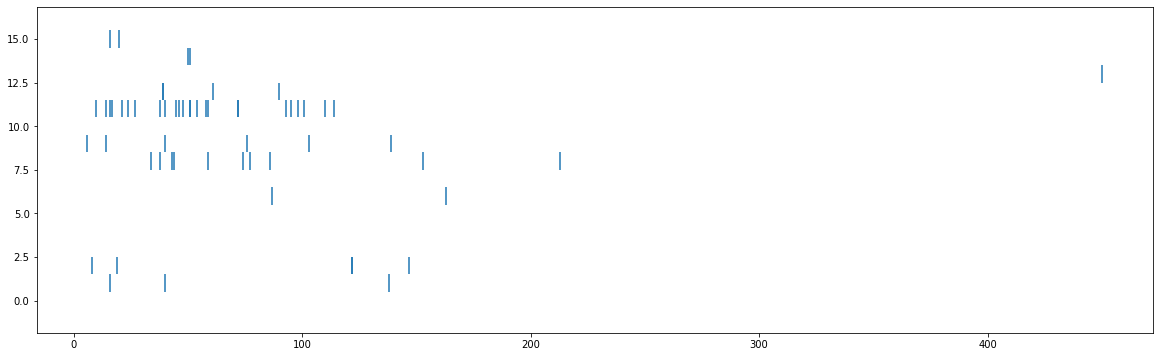

In [38]:
test = result[(result.flower == 'c-1') & (result.visitNum == 'FirstVisit/')].InterSweepInterval.values
print(test)
f =plt.figure(figsize = (20,6))
plt.eventplot(test,
             linelengths = 1,
             lineoffsets = 1)

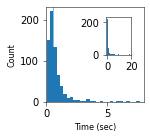

In [12]:
allValues = np.concatenate(result.InterSweepInterval.values)

f = plt.figure(figsize = (7/4, 7/4))
v, binEdges, _ = plt.hist(allValues*1/100, bins = 70)

plt.axvline(x = med_ISI)
plt.xlim(0, 8)
plt.ylabel('Count')
plt.xlabel('Time (sec)')

ax = f.add_axes([0.6,0.5,0.2,0.3])
_,_,_ = ax.hist(allValues*1/100, bins = 70)

plt.savefig(r"../dataFolders/PaperPipelineOutput/Figures/v3/Paper/InterSweepIntervalAllTogetherHist_v1.pdf")

c-10 Figure(252x756)
FirstVisit/
Later7thVisit/
Later20thVisit/
c-1 Figure(252x756)
FirstVisit/
Later7thVisit/
Later20thVisit/
c-2 Figure(252x756)
FirstVisit/
Later7thVisit/
Later20thVisit/
c-3 Figure(252x756)
FirstVisit/
Later7thVisit/
Later20thVisit/


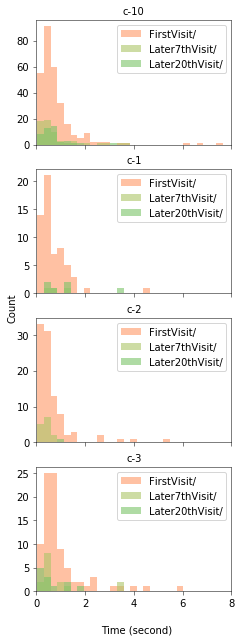

In [96]:
f, ax = plt.subplots(4, 1, figsize = (3.5, 3.5*3), sharex = True
#                      , sharey = True
                    )
ff = 0
for flower, df in result.groupby('flower', sort = False):
    print(flower, f)
    c = 0
    for visit, subdf in df.groupby('visitNum', sort = False):
        isi = np.concatenate(subdf.InterSweepInterval.values*1/100)
        ax[ff].hist(isi
                   , bins = binEdges
                   ,label = visit
                   , alpha = 0.6
#                 , density = True
                  , histtype = 'stepfilled'
                  , color = color[c])
        
        print(visit)
        c+=1
    ax[ff].legend()
    ax[ff].set_title(flower)
    ax[ff].set_xlim(0,8)
    ff+=1

f.text(0.525, 0.07, 'Time (second)', ha='center')
f.text(0.01, 0.5, 'Count', va='center', rotation='vertical')
plt.savefig("../dataFolders/PaperPipelineOutput/Figures/v3/" + 'InterSweepIntervalHistogram.png')